In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
train=pd.read_csv(r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\obisity risk\train.csv")
test=pd.read_csv(r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\obisity risk\test.csv")

In [8]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [9]:
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
train.shape

(20758, 18)

In [13]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [15]:
# lowercase the col names for convinience

train.columns=[s.lower()for s in train.columns.tolist()]
train.rename(columns={'family_history_with_overweight':'family_history'},inplace=True)

test.columns = [s.lower() for s in test.columns.tolist()]
test.rename(columns={'family_history_with_overweight':'family_history'}, inplace=True)

In [16]:
train.head()

id  gender        age    height      weight family_history favc      fcvc  \
0   0    Male  24.443011  1.699998   81.669950            yes  yes  2.000000   
1   1  Female  18.000000  1.560000   57.000000            yes  yes  2.000000   
2   2  Female  18.000000  1.711460   50.165754            yes  yes  1.880534   
3   3  Female  20.952737  1.710730  131.274851            yes  yes  3.000000   
4   4    Male  31.641081  1.914186   93.798055            yes  yes  2.679664   

        ncp        caec smoke      ch2o scc       faf       tue       calc  \
0  2.983297   Sometimes    no  2.763573  no  0.000000  0.976473  Sometimes   
1  3.000000  Frequently    no  2.000000  no  1.000000  1.000000         no   
2  1.411685   Sometimes    no  1.910378  no  0.866045  1.673584         no   
3  3.000000   Sometimes    no  1.674061  no  1.467863  0.780199  Sometimes   
4  1.971472   Sometimes    no  1.979848  no  1.967973  0.931721  Sometimes   

                  mtrans           nobeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

# categorical features

In [18]:
train.select_dtypes(include='object').columns

Index(['gender', 'family_history', 'favc', 'caec', 'smoke', 'scc', 'calc',
       'mtrans', 'nobeyesdad'],
      dtype='object')

In [19]:
train.gender.value_counts()

Female    10422
Male      10336
Name: gender, dtype: int64

In [20]:
train.age.value_counts().sort_values(ascending=False)

18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
21.356288       1
25.191627       1
19.005725       1
38.939448       1
33.852953       1
Name: age, Length: 1703, dtype: int64

In [21]:
train.nobeyesdad.value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: nobeyesdad, dtype: int64

In [26]:
# There are two index,fix it


test.set_index('id',inplace=True)

In [24]:
print(train.columns)

Index(['gender', 'age', 'height', 'weight', 'family_history', 'favc', 'fcvc',
       'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'nobeyesdad'],
      dtype='object')


In [27]:
print(test.columns)

Index(['gender', 'age', 'height', 'weight', 'family_history', 'favc', 'fcvc',
       'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans'],
      dtype='object')


# Let's see the number of unique values in each of the columns

In [28]:
train_unique_values={}
test_unique_values={}

for data in [train,test]:
    for col in data.columns:
        if data[col].dtypes=='object':
            if 'nobeyesdad' in data.columns.tolist():
                train_unique_values[col] = data[col].nunique()
                
            else: test_unique_values[col] = data[col].nunique()  
                
                
train_unique_values['DataFrame'] = 'train_'
test_unique_values['DataFrame'] = 'test_'

combo = pd.DataFrame([train_unique_values, test_unique_values])
combo                

gender  family_history  favc  caec  smoke  scc  calc  mtrans  nobeyesdad  \
0       2               2     2     4      2    2     3       5         7.0   
1       2               2     2     4      2    2     4       5         NaN   

  DataFrame  
0    train_  
1     test_

In [29]:
train_unique_values = train.select_dtypes(include='object').nunique()
test_unique_values = test.select_dtypes(include='object').nunique()

# Add a label to indicate the DataFrame
train_unique_values['DataFrame'] = 'train_'
test_unique_values['DataFrame'] = 'test_'

# Combine into a single DataFrame
combo = pd.concat([train_unique_values, test_unique_values], axis=1).T
combo.reset_index(drop=True, inplace=True)

# Display the result
print(combo)

  gender family_history favc caec smoke scc calc mtrans nobeyesdad DataFrame
0      2              2    2    4     2   2    3      5          7    train_
1      2              2    2    4     2   2    4      5        NaN     test_


 observation
in all the features except the calc, the number of unique value matches. THis mismatch can be problematic as there might be a new class in the testset which is important but we are missing out, so lets see the value counts of this difference. Lets see which rows are having these always classes

In [32]:
train.calc.value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: calc, dtype: int64

In [33]:
test.calc.value_counts()

Sometimes     9979
no            3513
Frequently     346
Always           2
Name: calc, dtype: int64

In [34]:
test.calc.describe()

count         13840
unique            4
top       Sometimes
freq           9979
Name: calc, dtype: object

In [36]:
test.loc[test['calc'] == 'Always']

gender   age  height  weight family_history favc  fcvc  ncp  \
id                                                                   
24781  Female  20.0    1.66    60.0            yes  yes   3.0  3.0   
28201    Male  21.0    1.67    66.5             no  yes   2.0  3.0   

             caec smoke  ch2o scc  faf  tue    calc                 mtrans  
id                                                                          
24781      Always    no   2.0  no  0.0  0.0  Always  Public_Transportation  
28201  Frequently    no   2.0  no  1.0  0.0  Always  Public_Transportation

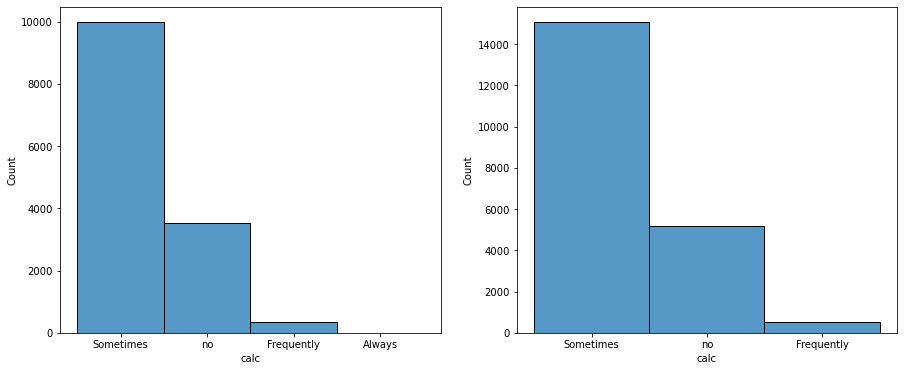

In [38]:
plot, axes = plt.subplots(1,2, figsize=(15,6))
sns.histplot(data=test, x='calc', ax=axes[0])
sns.histplot(data=train, x='calc', ax=axes[1])

plt.show()

# takeout

as we see, the difference is bc in the test class we have a new category of always not there are different ways to handle such difference.

Ignore the category

Merge the category with a similar close one: (BE AWARE of the risk of bias or misrepresentation into your analysis)

create a new category for the trainset as well

In this notebook i decided to add train['calc_Always'] = 0 becuase later that we do onehotencoding it will be in the columns list. Additionally, also merging is not a good approach since other features are somewhat different with other instances so i decided to not risk and just ignore it for now. Finally if you choose to go for the third approach then you might add train['calc_always'] = 0 this way you show that you actually realized it!

Lets now see the classes within each feature.

In [39]:
train['calc_Always']=0

In [43]:
cat_features=train.select_dtypes(include=['object']).columns.tolist()

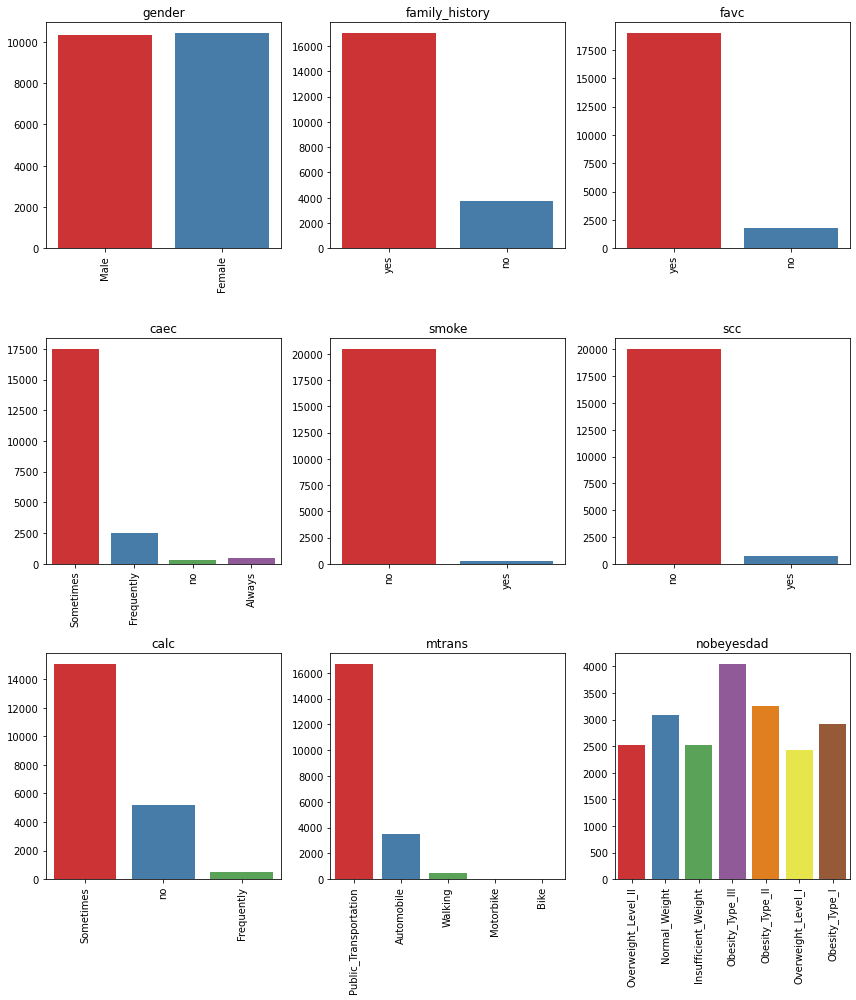

In [44]:
plot, axes = plt.subplots(3,3, figsize=(12,14))
axes = axes.flatten()

colors = []
for i, feature in enumerate(cat_features):
    sns.countplot(data=train, x=feature, ax=axes[i], palette='Set1')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_title(feature)
    axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), rotation=90)
        
plt.tight_layout()

# observation¶

we are seeing a huge difference in the class balance of each of the features. For instance in the smoke majority of the samples are non-smoking, same for scc. So lets see the impact on the obesity class...

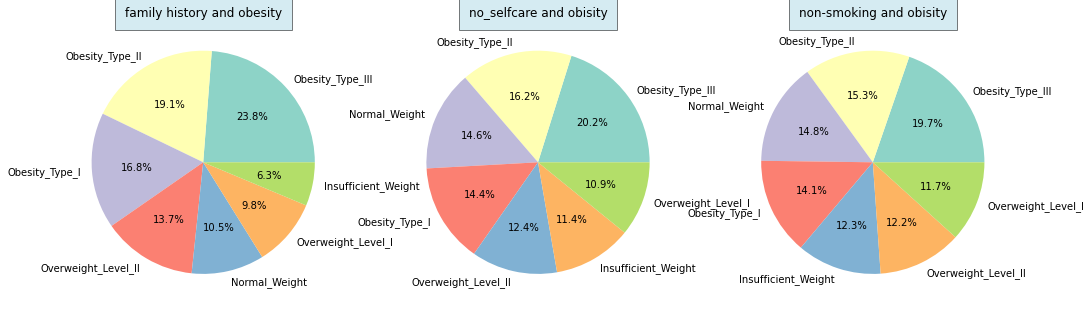

In [45]:
non_smoking = train[train.smoke == 'no'].nobeyesdad.value_counts()
no_selfcare = train[train.scc == 'no'].nobeyesdad.value_counts()
has_fam_history = train[train.family_history == 'yes'].nobeyesdad.value_counts()

list_features = [has_fam_history, no_selfcare, non_smoking]
titles = ['family history and obesity', 'no_selfcare and obisity', 'non-smoking and obisity']

fig, ax = plt.subplots(1, 3, figsize=(17,15))

for i, feature in enumerate(list_features):
    ax[i].pie(x=feature, labels=feature.index, autopct='%.1f%%', colors=sns.color_palette('Set3'))
    ax[i].set_title(titles[i % len(titles)], bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
    #ax[i].set_xticklabels(labels=ax[i].get_xticklabels(), rotation=45)
    ax[i].set_xticklabels(labels=ax[i].get_xticklabels(), rotation=45)



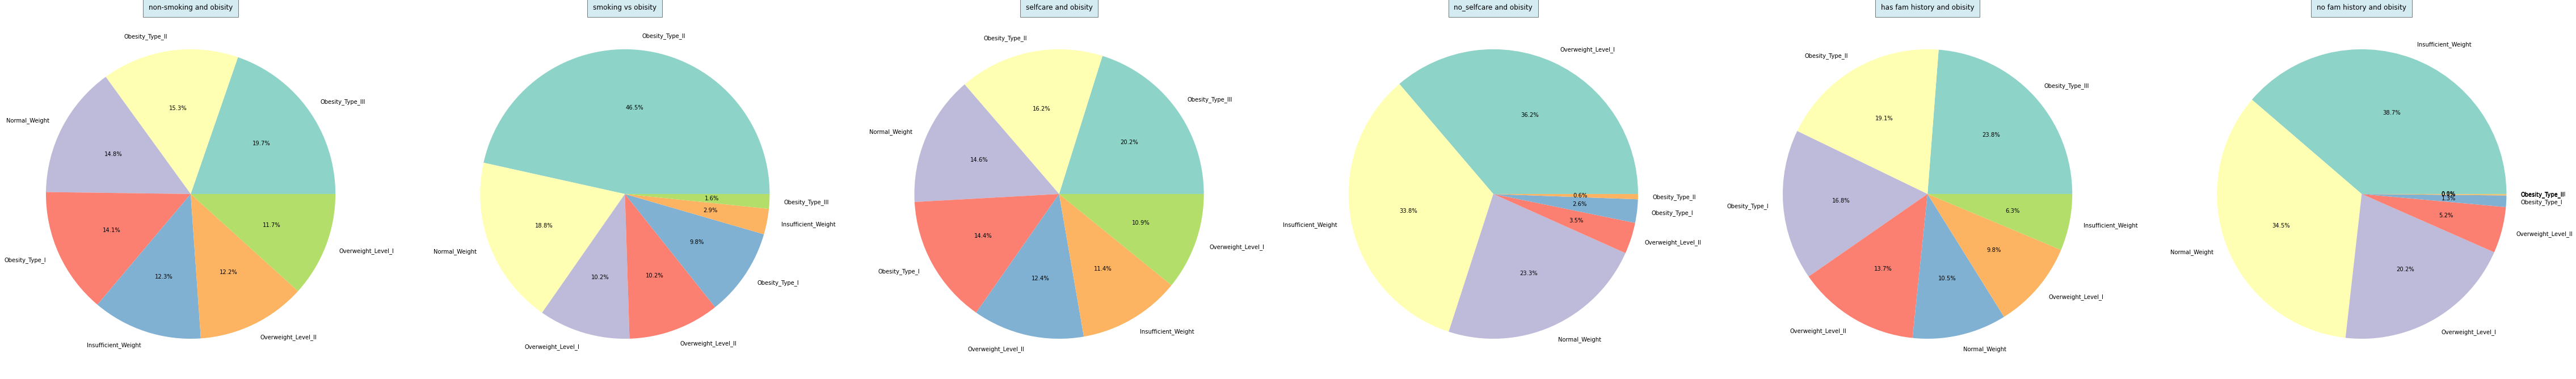

In [48]:
#non smoking vs smoking and the distribution in the obisity
non_smoking = train[train.smoke == 'no'].nobeyesdad.value_counts()
smoking = train[train.smoke == 'yes'].nobeyesdad.value_counts()

#no selfcare vs selfcare and the distribution in obisity
no_selfcare = train[train.scc == 'no'].nobeyesdad.value_counts()
selfcare = train[train.scc == 'yes'].nobeyesdad.value_counts()

#no fam hisory vs famhistory 
has_fam_history = train[train.family_history == 'yes'].nobeyesdad.value_counts()
no_fam_history = train[train.family_history == 'no'].nobeyesdad.value_counts()

list_features = [non_smoking, smoking, no_selfcare, selfcare, has_fam_history, no_fam_history]
titles = ['non-smoking and obisity', 'smoking vs obisity', 'selfcare and obisity','no_selfcare and obisity', 'has fam history and obisity', 'no fam history and obisity']

fig, ax = plt.subplots(1,6, figsize=(80,15))

for i, feature in enumerate(list_features):
    ax[i].pie(x=feature, labels=feature.index, autopct='%.1f%%', colors=sns.color_palette('Set3'))
    ax[i].set_title(titles[i % len(titles)], bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
    ax[i].set_xticklabels(labels=ax[i].get_xticklabels(), rotation=45)

plt.show()

now lets see the obeyesed itself to see whether we have a balanced class or not

In [49]:
class_ob = train['nobeyesdad'].value_counts()
class_ob

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: nobeyesdad, dtype: int64

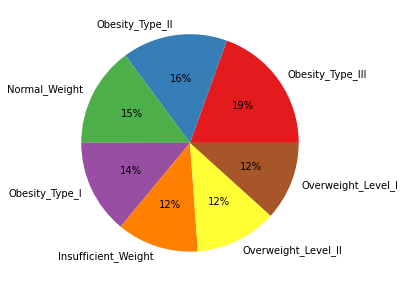

In [50]:
plot, ax = plt.subplots(figsize=(5,5))
ax.pie(x= class_ob,autopct='%.0f%%', labels=class_ob.index, colors=sns.color_palette('Set1'))
plt.show()

as we can see we have a fairly balanced class for each of the labels

# Numeric features Distributions

Alright, now lets see the distribution of the numeric features to see we have any skewed distribution or outliers or so

# Numeric features

In [51]:
numeric_train = train.select_dtypes(include=['float64'])
print(numeric_train)

             age    height      weight      fcvc       ncp      ch2o  \
id                                                                     
0      24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1      18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2      18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3      20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4      31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...          ...       ...         ...       ...       ...       ...   
20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            faf       tue  
id                         
0      

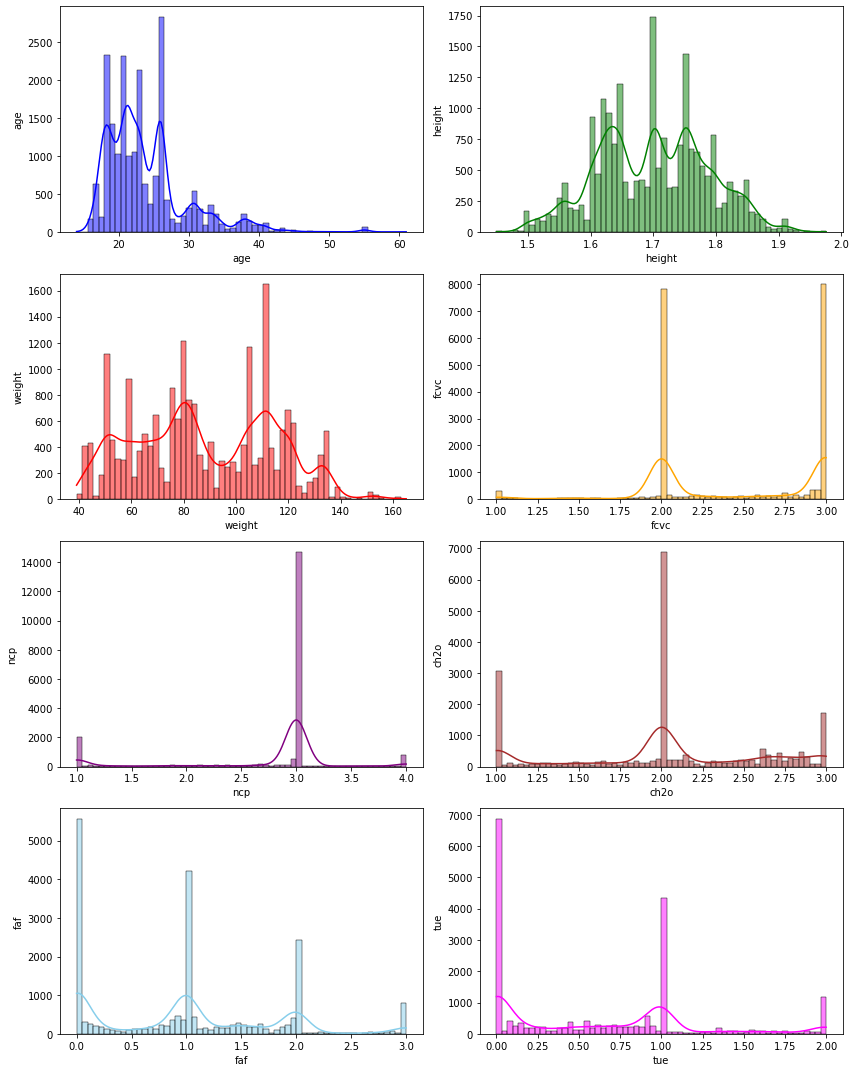

In [52]:
plot, axs = plt.subplots(4,2, figsize=(12,15))
axs = axs.flatten()
#plt.style.use('seaborn-v0_8-whitegrid')
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'skyblue', 'magenta']

for i, feature in enumerate(numeric_train):
    sns.histplot(data=train, x=feature , ax= axs[i], bins=60, kde=True, color=colors[i % len(colors)])
    axs[i].set_ylabel(feature)
    
    
plt.tight_layout()
plt.show()  

# observation

In age we can see that the distribution is skewed to right. This means the majority of the data is toward the left side. If we see age.describe we se that the mean is 23, so this kinda prove what we witness in the figure and majority of data being on left side rather than big ages! However, the overal impact of skewness is on the mean/std of the distribution. So to see whether this skewness is causing the mean to be shifted or the original data having more data toward the left side, we can see the value_counts of age.

In [54]:
train.age.describe()

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: age, dtype: float64

In [55]:
train.age.value_counts().sort_values(ascending=False)

18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
21.356288       1
25.191627       1
19.005725       1
38.939448       1
33.852953       1
Name: age, Length: 1703, dtype: int64

so as seen the we have LOTS of data below the mean rather than upper mean so this is kinda in line with our prior observation. All these observations are leading to the decision that do we wanna take care of the skewness by some transformatiion techniques or so, OR no and we wanna leave it the way it is! Thats why we kinda explore age a lil bit! We will count the amount of this skewness later in the feature engineering section

# calculating skewness

In [56]:
train.age.skew()

1.5862517094133515

In [57]:
train.age.mean()

23.841804418681914

so again, i decided to not do the transformation for the skewness bc of the risk of interfering in the data or imposing some sort of bias

# adding bmi

In [58]:
train['bmi']=train.weight/(train.height)**2

In [59]:
train.head()

gender        age    height      weight family_history favc      fcvc  \
id                                                                          
0     Male  24.443011  1.699998   81.669950            yes  yes  2.000000   
1   Female  18.000000  1.560000   57.000000            yes  yes  2.000000   
2   Female  18.000000  1.711460   50.165754            yes  yes  1.880534   
3   Female  20.952737  1.710730  131.274851            yes  yes  3.000000   
4     Male  31.641081  1.914186   93.798055            yes  yes  2.679664   

         ncp        caec smoke      ch2o scc       faf       tue       calc  \
id                                                                            
0   2.983297   Sometimes    no  2.763573  no  0.000000  0.976473  Sometimes   
1   3.000000  Frequently    no  2.000000  no  1.000000  1.000000         no   
2   1.411685   Sometimes    no  1.910378  no  0.866045  1.673584         no   
3   3.000000   Sometimes    no  1.674061  no  1.467863  0.780199  Sometimes   
4   1.971472   Sometimes    no  1.979848  no  1.967973  0.931721  Sometimes   

                   mtrans           nobeyesdad  calc_Always        bmi  
id                                                                      
0   Public_Transportation  Overweight_Level_II            0  28.259565  
1              Automobile        Normal_Weight            0  23.422091  
2   Public_Transportation  Insufficient_Weight            0  17.126706  
3   Public_Transportation     Obesity_Type_III            0  44.855798  
4   Public_Transportation  Overweight_Level_II            0  25.599151

# Feature Eng

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

In [62]:
cat_fz = train.select_dtypes(include=['object']).columns.tolist()
print(cat_fz)

if 'nobeyesdad' in cat_fz:
    cat_fz.remove('nobeyesdad')
    
for feature in train[cat_fz]:
    if train[feature].nunique() ==2 : #before it was 3 but problematic in calc -- difference test/train
        train[feature] = le.fit_transform(train[feature])    
    else:
        train[feature] = train[feature].astype('object')
    

['gender', 'family_history', 'favc', 'caec', 'smoke', 'scc', 'calc', 'mtrans', 'nobeyesdad']


In [63]:
print(cat_fz) #'nobeyesdad' should not be in it!!!

['gender', 'family_history', 'favc', 'caec', 'smoke', 'scc', 'calc', 'mtrans']


In [64]:
#convert 'nobeyesdad' seperately
le=LabelEncoder()
train['nobeyesdad']=le.fit_transform(train['nobeyesdad'])

# Separate features (X) and target variable (y)
X = train.drop('nobeyesdad', axis=1)
y = train['nobeyesdad']

In [67]:
train.nobeyesdad.value_counts()

4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: nobeyesdad, dtype: int64

## takeout

So here i decided to labelencode the features that are having less than 3 instances, meaning the classes that are yes/no or calc that has 3 type values bc if your categorical heature has more than say 2 or 3 types (like the transportation column) if u try to encode it with labelencoder it kinda lose its meaning. bc label encoder treat it as some sort of ranking while in our original data there is no difference interms of ranking between walking vs bike in transportation. So I decided for the categorical_features that are having more than 3 types, to use either OneHotEncoder from SKlearn or pd.get_dummies from pandas.

In [69]:
train.head()

gender        age    height      weight  family_history  favc      fcvc  \
id                                                                            
0        1  24.443011  1.699998   81.669950               1     1  2.000000   
1        0  18.000000  1.560000   57.000000               1     1  2.000000   
2        0  18.000000  1.711460   50.165754               1     1  1.880534   
3        0  20.952737  1.710730  131.274851               1     1  3.000000   
4        1  31.641081  1.914186   93.798055               1     1  2.679664   

         ncp        caec  smoke      ch2o  scc       faf       tue       calc  \
id                                                                              
0   2.983297   Sometimes      0  2.763573    0  0.000000  0.976473  Sometimes   
1   3.000000  Frequently      0  2.000000    0  1.000000  1.000000         no   
2   1.411685   Sometimes      0  1.910378    0  0.866045  1.673584         no   
3   3.000000   Sometimes      0  1.674061    0  1.467863  0.780199  Sometimes   
4   1.971472   Sometimes      0  1.979848    0  1.967973  0.931721  Sometimes   

                   mtrans  nobeyesdad  calc_Always        bmi  
id                                                             
0   Public_Transportation           6            0  28.259565  
1              Automobile           1            0  23.422091  
2   Public_Transportation           0            0  17.126706  
3   Public_Transportation           4            0  44.855798  
4   Public_Transportation           6            0  25.599151

In [70]:
train.select_dtypes(include='object').count()

caec      20758
calc      20758
mtrans    20758
dtype: int64

In [71]:
train.dtypes

gender              int32
age               float64
height            float64
weight            float64
family_history      int32
favc                int32
fcvc              float64
ncp               float64
caec               object
smoke               int32
ch2o              float64
scc                 int32
faf               float64
tue               float64
calc               object
mtrans             object
nobeyesdad          int32
calc_Always         int64
bmi               float64
dtype: object

before moving forward lets now that we have numeric features in almost most part of our trainset, lets standardilize it first, meaning run the sdandardscalar on it. the purpose is to make each of the features unit-free or unit-independen

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerinc_fetures = train.select_dtypes(include=['float64' , 'int64']).columns.tolist()
if 'nobeyesdad' in numerinc_fetures:
    numerinc_fetures.remove('nobeyesdad') #remove 'nobeyesdad' bc if we do the sc on this
                                        #its gonna convert it to numeric values other than 
                                        #0,1,2,3,4,5,6 which later would be invalid for our 
                                      # xgboost model!
for feature in numerinc_fetures:
    train[feature] = sc.fit_transform(train[[feature]])

In [73]:
train.head()

gender       age    height    weight  family_history  favc      fcvc  \
id                                                                         
0        1  0.105699 -0.002828 -0.235713               1     1 -0.836279   
1        0 -1.027052 -1.606291 -1.170931               1     1 -0.836279   
2        0 -1.027052  0.128451 -1.430012               1     1 -1.060332   
3        0 -0.507929  0.120090  1.644770               1     1  1.039171   
4        1  1.371197  2.450367  0.224054               1     1  0.438397   

         ncp        caec  smoke      ch2o  scc       faf       tue       calc  \
id                                                                              
0   0.314684   Sometimes      0  1.206594    0 -1.171141  0.597438  Sometimes   
1   0.338364  Frequently      0 -0.048349    0  0.021775  0.636513         no   
2  -1.913423   Sometimes      0 -0.195644    0 -0.138022  1.755239         no   
3   0.338364   Sometimes      0 -0.584035    0  0.579896  0.271455  Sometimes   
4  -1.119801   Sometimes      0 -0.081469    0  1.176486  0.523111  Sometimes   

                   mtrans  nobeyesdad  calc_Always       bmi  
id                                                            
0   Public_Transportation           6          0.0 -0.237862  
1              Automobile           1          0.0 -0.818331  
2   Public_Transportation           0          0.0 -1.573741  
3   Public_Transportation           4          0.0  1.753591  
4   Public_Transportation           6          0.0 -0.557096

now lets encode the remaining cat_features which are caec, mtrans. for this there are 2 approaches that are giving us kinda same result; 1. OneHotEncoder 2. get_dummies both will give us the onehotencoded of the words inside those features. make sure to put a bit of time to understand the way these 2 approaches are slightly different.

Lets first drop the nopbeyeded columns as we dont wanna do this feature engineering on it.

In [74]:
target_col = train.pop('nobeyesdad') #difference pop, remove is that pop will save the column

In [75]:
remained_cat_features = train.select_dtypes(include=['object']).columns.tolist()

In [76]:
print(remained_cat_features) #'nobeyesdad' should not be here

['caec', 'calc', 'mtrans']


so now we are ready to get the OneHotEncoding for the remaining categorical features, as explained above, i am using get_dummies from pandas here to get the encodings but one can also use the OneHotEncoder from sklearn, the difference is if you choose to go for sklearn approach, be careful as the fit_transfom will take 2D array as input so u either reshape it or slice the df directly!

In [77]:
# lets get the OneHot Encoding for these remaining categorical features 
train = pd.get_dummies(data=train, columns=remained_cat_features, drop_first=False, dtype='int')

In [78]:
train.head()

gender       age    height    weight  family_history  favc      fcvc  \
id                                                                         
0        1  0.105699 -0.002828 -0.235713               1     1 -0.836279   
1        0 -1.027052 -1.606291 -1.170931               1     1 -0.836279   
2        0 -1.027052  0.128451 -1.430012               1     1 -1.060332   
3        0 -0.507929  0.120090  1.644770               1     1  1.039171   
4        1  1.371197  2.450367  0.224054               1     1  0.438397   

         ncp  smoke      ch2o  ...  caec_Sometimes  caec_no  calc_Frequently  \
id                             ...                                             
0   0.314684      0  1.206594  ...               1        0                0   
1   0.338364      0 -0.048349  ...               0        0                0   
2  -1.913423      0 -0.195644  ...               1        0                0   
3   0.338364      0 -0.584035  ...               1        0                0   
4  -1.119801      0 -0.081469  ...               1        0                0   

    calc_Sometimes  calc_no  mtrans_Automobile  mtrans_Bike  mtrans_Motorbike  \
id                                                                              
0                1        0                  0            0                 0   
1                0        1                  1            0                 0   
2                0        1                  0            0                 0   
3                1        0                  0            0                 0   
4                1        0                  0            0                 0   

    mtrans_Public_Transportation  mtrans_Walking  
id                                                
0                              1               0  
1                              0               0  
2                              1               0  
3                              1               0  
4                              1               0  

[5 rows x 27 columns]

so we processed the prep steps succcessfuly, now we will go for modeling....

## Split the data

In [79]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(train, target_col, test_size=0.2, random_state=0)

# Modeling

now we get to the modeling phase, before getting started with the process, make sure to put a few minutes to first think about the model and why you wanna use such model! So here is my explanation, since the problem is multi-class classifcation so we need to for the models that are a good fit for such problem For instance, these are the list of models you can use for such problem;

Multinominal LogisticRegression
Random Forest
Gradient Boosting (e.g. XGBoost)
SVM
KNN
In this tutorial i am using XGBoost for the modeling purpose. XGBoost is technically an ensemble based model, meaning we have a combo of 2 or more weak learner model that we combine all together for our predictive purpose. The way it works is actually we pick a base predictive model whose prediction can be fairly naive, we run it on our dataset, then we calculate the loss. Then based on the calculated loss, we will add a new model to be adding to the ensemble cycle, we will determine the model parapeters in a way that by adding it, the loss will potentially decrease Note that the "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model

In [81]:
from xgboost import XGBClassifier

In [82]:
params_ = {
    'booster': 'gbtree', #uses tree-based model 
    'objective': 'multi:softmax',
    'num_class': 7, #the obisity type classes
    'eval_metric': 'merror', #Multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases)
    'n_estimators': 235,
    'min_split_loss': 0.08599260691424013,
    'learning_rate': 0.0567248810160126,
    'max_depth': 9,
    'subsample': 0.9863907947703492,
    'colsample_bytree': 0.3378626948499556,
    'min_child_weight': 10,
    'reg_lambda': 0.010169755101075147, #L2 regularization term on weights. Increasing this value will make model more conservative.
    'reg_alpha': 2.1888900002466063e-08,
    'validate_parameters': True,
}

In [83]:
xgb = XGBClassifier(**params_)

In [85]:
#fit the model to the train data
xgb.fit(X_train, y_train) #fit the model on the trainset

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3378626948499556, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=0.0859926045, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0567248810160126,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=10,
              min_split_loss=0.08599260691424013, missing=nan,
              monotone_constraints='()', n_estimators=235, n_jobs=0,
              num_class=7, num_parallel_tree=1, ...)

In [86]:
#predict on raw testset (no preprocess is done on test set yet)
y_pred_test = xgb.predict(X_test) #predict on raw tests

In [87]:
acc = np.mean(y_pred_test == y_test) #lets examine the accuracy of our prediction

In [88]:
acc

0.9026974951830443

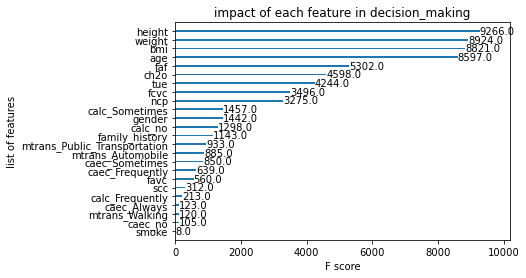

In [89]:
#plot feature importance
from xgboost import plot_importance
plot_importance(xgb, title="impact of each feature in decision_making",
                importance_type='weight', ylabel='list of features', 
                grid= False)
plt.show()